In [3]:

from qiskit import ClassicalRegister, QuantumRegister,QuantumCircuit,transpile, execute,BasicAer
from numpy import pi
from qiskit.circuit import Parameter
import numpy as np
from qiskit.tools.visualization import circuit_drawer,plot_histogram
import matplotlib.pyplot as plt





In [17]:
init = { "|0>,|1>":[2], "|1>,|1>":[0,2] , "|3>,|1>":[0,1,2]}
list(init.keys())



['|0>,|1>', '|1>,|1>', '|3>,|1>']

In [18]:

def QFourier(values):
    CIRC= []
   

    #
    for key in values:
        qreg_q = QuantumRegister(4, 'q')
        creg_c = ClassicalRegister(4, 'c')
        circuit = QuantumCircuit(qreg_q, creg_c)
        position = values[key]
        if len(position)>0:
            circuit.x(qreg_q[position])
        circuit.barrier()
        circuit.h(qreg_q[2])
        circuit.t(qreg_q[2])
        circuit.cx(qreg_q[3], qreg_q[2])
        circuit.tdg(qreg_q[2])
        circuit.t(qreg_q[3])
        circuit.cx(qreg_q[3], qreg_q[2])
        circuit.s(qreg_q[2])
        circuit.cx(qreg_q[0], qreg_q[2])
        circuit.s(qreg_q[0])
        circuit.s(qreg_q[1])
        circuit.sdg(qreg_q[2])
        circuit.cx(qreg_q[0], qreg_q[2])

        circuit.t(qreg_q[1])
        circuit.t(qreg_q[2])
        circuit.cx(qreg_q[1], qreg_q[2])
        circuit.tdg(qreg_q[2])
        circuit.cx(qreg_q[1], qreg_q[2])
        circuit.h(qreg_q[2])
        circuit.cx(qreg_q[3], qreg_q[2])
        circuit.h(qreg_q[2])
        circuit.h(qreg_q[3])
        circuit.cx(qreg_q[3], qreg_q[2])
        circuit.h(qreg_q[2])
        circuit.h(qreg_q[3])
        circuit.cx(qreg_q[3], qreg_q[2])
        circuit.h(qreg_q[2])
        circuit.s(qreg_q[2])
        circuit.cx(qreg_q[1], qreg_q[2])
        circuit.sdg(qreg_q[2])
        circuit.cx(qreg_q[1], qreg_q[2])

        circuit.cx(qreg_q[3], qreg_q[2])
        circuit.h(qreg_q[2])
        circuit.h(qreg_q[3])
        circuit.tdg(qreg_q[2])
        circuit.t(qreg_q[3])
        circuit.h(qreg_q[2])
        circuit.h(qreg_q[3])
        circuit.cx(qreg_q[3], qreg_q[2])

        circuit.tdg(qreg_q[3])
        circuit.h(qreg_q[3])

        circuit.barrier()
        measure = [0,1,2,3]
        for i in measure:
            circuit.measure(qreg_q[i], creg_c[i])
     #   circuit.draw(output='mpl')
        CIRC.append(circuit)
    return CIRC



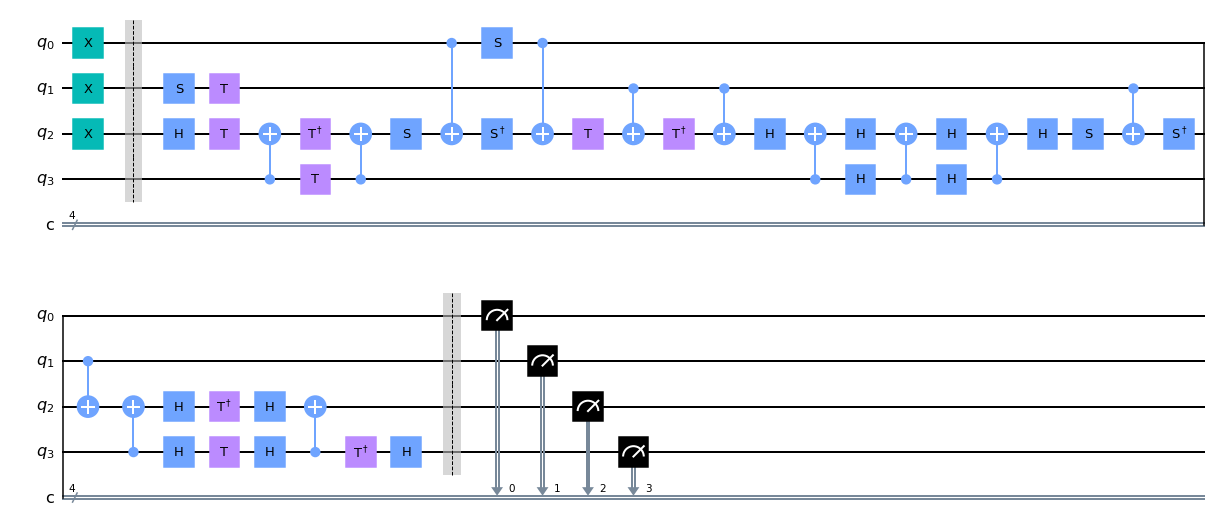

In [19]:
CIRCUITS= QFourier(init)
CIRCUITS[-1].draw(output="mpl")


In [20]:
# Run the code
def RunQFourier(circuits):
    simulator = BasicAer.get_backend('qasm_simulator')
    COUNTS=[]
    for i in range(len(circuits)):
        job = simulator.run(transpile(circuits[i], simulator),shots= 8000)
    #測定結果の取り出し
        result = job.result()
        counts = result.get_counts()
        COUNTS.append(counts)
    return COUNTS

        

In [21]:
MY_COUNTS = RunQFourier(CIRCUITS)



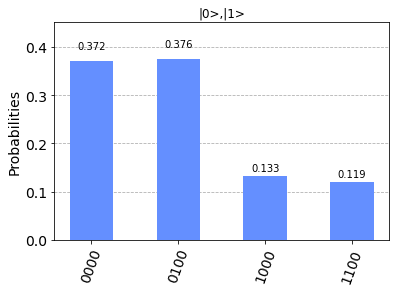

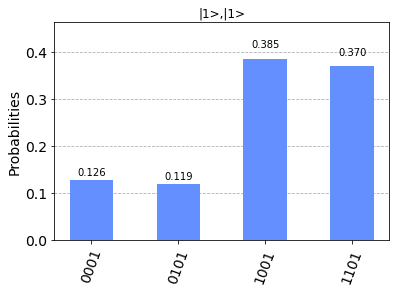

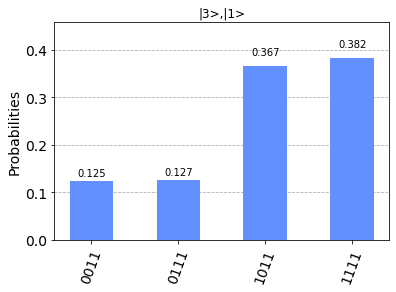

In [22]:
for i in range(3):
    labels = list(init.keys())
    fig = plt.figure(i)
    plt.plot()
    axs  = fig.get_axes()
    plot_histogram(MY_COUNTS[i],ax =axs[0],title="%s"%(labels[i]))

In [ ]:
# The results obtained did not differ much with those obtained in the article.
